In [1]:
from matplotlib import pyplot as plt
import tensorflow_datasets
import tensorflow as tf
import numpy as np

In [2]:
def normilize(image, label):
    return tf.cast(image, tf.float32) / 256, label

In [3]:
(train, test), info = tensorflow_datasets.load('mnist', split=['train', 'test'], as_supervised=True, with_info=True)

In [4]:
info.splits

{'train': <SplitInfo num_examples=60000, num_shards=1>,
 'test': <SplitInfo num_examples=10000, num_shards=1>}

In [5]:
train = train.map(normilize)
train = train.cache()
train = train.shuffle(info.splits['train'].num_examples)
train = train.batch(256)
train = train.prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
test = test.map(normilize)
test = test.cache()
test = test.batch(256)
test = test.prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Dense(128, activation='linear'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [9]:
history = model.fit(train, epochs=15, validation_data=test)

Epoch 1/15
235/235 [==============================] - 7s 14ms/step - loss: 0.6131 - sparse_categorical_accuracy: 0.8143 - val_loss: 0.2307 - val_sparse_categorical_accuracy: 0.9353
Epoch 2/15
235/235 [==============================] - 2s 9ms/step - loss: 0.2456 - sparse_categorical_accuracy: 0.9279 - val_loss: 0.1648 - val_sparse_categorical_accuracy: 0.9528
Epoch 3/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1913 - sparse_categorical_accuracy: 0.9433 - val_loss: 0.1442 - val_sparse_categorical_accuracy: 0.9578
Epoch 4/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.1196 - val_sparse_categorical_accuracy: 0.9650
Epoch 5/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1402 - sparse_categorical_accuracy: 0.9572 - val_loss: 0.1142 - val_sparse_categorical_accuracy: 0.9662
Epoch 6/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1269 - sparse_categori

In [10]:
model.save(f"mlp.keras")

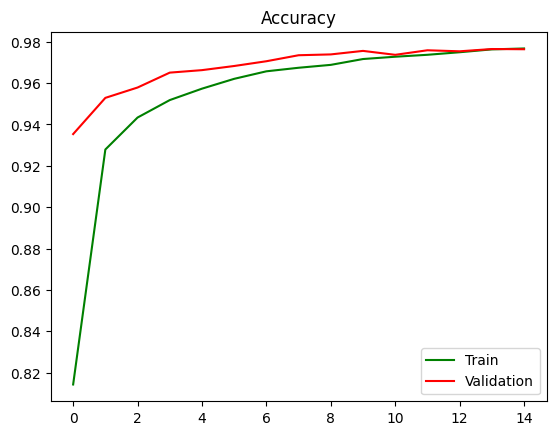

In [11]:
plt.plot(history.history['sparse_categorical_accuracy'], color='green', label='Train')
plt.plot(history.history['val_sparse_categorical_accuracy'], color='red', label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()